In [5]:
from sentence_transformers import SentenceTransformer
import pandas as pd
from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from affinity.load_data.scraper import scrape, scraper
import requests
import xmltodict
from sklearn.cluster import KMeans
import matplotlib.plot as plt

/Users/martafillolbruguera/.pyenv/versions/3.10.6/envs/affinity_env/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


ModuleNotFoundError: No module named 'matplotlib.plot'

## scrape & clean data

In [2]:
sitemap_urls = [
    "https://www.houseandgarden.co.uk/sitemap.xml?year=2024&month=6&week=1",
    "https://www.vanityfair.com/sitemap.xml?year=2024&month=6&week=1",
    "https://www.epicurious.com/sitemap.xml?year=2024&month=6&week=1",
    "https://www.epicurious.com/sitemap.xml?year=2024&month=5&week=3",
    "https://www.cntraveller.com/sitemap.xml?year=2024&month=5&week=5",
    "https://www.voguebusiness.com/sitemap.xml?year=2024&month=5&week=5",
    "https://www.voguebusiness.com/sitemap.xml?year=2024&month=5&week=3",
    "https://pitchfork.com/sitemap.xml?year=2024&month=5&week=4",
    "https://www.self.com/sitemap.xml?year=2024&month=6&week=1",
    "https://www.self.com/sitemap.xml?year=2024&month=4&week=3",
    "https://www.worldofinteriors.com/sitemap.xml?year=2024&month=2&week=3",
    "https://www.worldofinteriors.com/sitemap.xml?year=2024&month=5&week=4",
    "https://www.worldofinteriors.com/sitemap.xml?year=2023&month=6&week=2",
    "https://www.architecturaldigest.com/sitemap.xml?year=2024&month=6&week=1",
    "https://www.newyorker.com/sitemap.xml?year=2024&month=6&week=1",
    "https://www.tatler.com/sitemap.xml?year=2024&month=6&week=1"
]

In [3]:
# List of base sitemap URLs with placeholders for year, month, and week
base_sitemap_urls = [
    "https://www.houseandgarden.co.uk/sitemap.xml?year={year}&month={month}&week={week}",
    "https://www.vanityfair.com/sitemap.xml?year={year}&month={month}&week={week}",
    "https://www.epicurious.com/sitemap.xml?year={year}&month={month}&week={week}",
    "https://www.epicurious.com/sitemap.xml?year={year}&month={month}&week={week}",
    "https://www.cntraveller.com/sitemap.xml?year={year}&month={month}&week={week}",
    "https://www.voguebusiness.com/sitemap.xml?year={year}&month={month}&week={week}",
    "https://www.voguebusiness.com/sitemap.xml?year={year}&month={month}&week={week}",
    "https://pitchfork.com/sitemap.xml?year={year}&month={month}&week={week}",
    "https://www.self.com/sitemap.xml?year={year}&month={month}&week={week}",
    "https://www.self.com/sitemap.xml?year={year}&month={month}&week={week}",
    "https://www.worldofinteriors.com/sitemap.xml?year={year}&month={month}&week={week}",
    "https://www.worldofinteriors.com/sitemap.xml?year={year}&month={month}&week={week}",
    "https://www.worldofinteriors.com/sitemap.xml?year={year}&month={month}&week={week}",
    "https://www.architecturaldigest.com/sitemap.xml?year={year}&month={month}&week={week}",
    "https://www.newyorker.com/sitemap.xml?year={year}&month={month}&week={week}",
    "https://www.tatler.com/sitemap.xml?year={year}&month={month}&week={week}"
]

# Generate combinations of URLs by changing year, month, and week
sitemap_urls = []
for year in range(2020, 2025):
    for month in range(1, 13):
        for week in range(1, 5):
            for base_url in base_sitemap_urls:
                sitemap_urls.append(base_url.format(year=year, month=month, week=week))

# Print the generated sitemap URLs
for url in sitemap_urls:
    print(url)


https://www.houseandgarden.co.uk/sitemap.xml?year=2020&month=1&week=1
https://www.vanityfair.com/sitemap.xml?year=2020&month=1&week=1
https://www.epicurious.com/sitemap.xml?year=2020&month=1&week=1
https://www.epicurious.com/sitemap.xml?year=2020&month=1&week=1
https://www.cntraveller.com/sitemap.xml?year=2020&month=1&week=1
https://www.voguebusiness.com/sitemap.xml?year=2020&month=1&week=1
https://www.voguebusiness.com/sitemap.xml?year=2020&month=1&week=1
https://pitchfork.com/sitemap.xml?year=2020&month=1&week=1
https://www.self.com/sitemap.xml?year=2020&month=1&week=1
https://www.self.com/sitemap.xml?year=2020&month=1&week=1
https://www.worldofinteriors.com/sitemap.xml?year=2020&month=1&week=1
https://www.worldofinteriors.com/sitemap.xml?year=2020&month=1&week=1
https://www.worldofinteriors.com/sitemap.xml?year=2020&month=1&week=1
https://www.architecturaldigest.com/sitemap.xml?year=2020&month=1&week=1
https://www.newyorker.com/sitemap.xml?year=2020&month=1&week=1
https://www.tatler

In [4]:
len(sitemap_urls)

3840

In [5]:
def fetch_sitemap_urls(sitemap_url):
    try:
        response = requests.get(sitemap_url)
        if response.status_code == 200:

            dict_data = xmltodict.parse(response.content)

            urls = [entry['loc'] for entry in dict_data['urlset']['url']]

            return urls
    except:
        return []
    else:
        print(f"Failed to fetch {sitemap_url}: Status code {response.status_code}")
    return []

In [6]:
fetch_sitemap_urls(sitemap_urls[0])

['https://www.houseandgarden.co.uk/gallery/inside-the-sets-of-this-years-golden-globewinning-productions',
 'https://www.houseandgarden.co.uk/article/things-to-put-in-frames-isabella-cotier',
 'https://www.houseandgarden.co.uk/article/things-to-put-in-frames-rose-electra-harris',
 'https://www.houseandgarden.co.uk/gallery/february-2020-house-garden',
 'https://www.houseandgarden.co.uk/article/unfashionable-beauties-exploring-the-conifer',
 'https://www.houseandgarden.co.uk/gallery/bryan-osullivan-house',
 'https://www.houseandgarden.co.uk/recipe/endive-salad-with-charred-leeks-and-thyme-oil',
 'https://www.houseandgarden.co.uk/article/new-picture-of-the-royal-family',
 'https://www.houseandgarden.co.uk/gallery/ten-design-trends-that-defined-the-past-decade',
 'https://www.houseandgarden.co.uk/recipe/bridget-jones-pan-fried-salmon',
 'https://www.houseandgarden.co.uk/article/decimo-restaurant-review',
 'https://www.houseandgarden.co.uk/article/how-to-be-creative-with-space-in-the-kitche

In [7]:
import multiprocessing as mp

mp.cpu_count()

8

In [8]:
from tqdm import tqdm
import concurrent.futures
from tqdm import tqdm

def process_sitemap(sitemap_url):
    return fetch_sitemap_urls(sitemap_url)

all_urls = []

with concurrent.futures.ThreadPoolExecutor() as executor:
    # Use tqdm to show progress bar
    results = list(tqdm(executor.map(process_sitemap, sitemap_urls), total=len(sitemap_urls)))

for result in results:
    all_urls.extend(result)

100%|██████████| 3840/3840 [02:50<00:00, 22.51it/s]


In [9]:
#save list of urls as csv
#list_urls.to_csv("list_urls")
inventory_urls= pd.DataFrame()
inventory_urls["urls"]=all_urls
inventory_urls.to_csv("/Users/martafillolbruguera/code/affinity_at_scale/data/inventory_urls.csv",index=False)

In [67]:
#import inventory_urls to scrape

scraped_inventory = pd.read_csv("/Users/martafillolbruguera/code/affinity_at_scale/data/inventory_urls.csv").sample(frac=0.1)


In [68]:
all_urls = scraped_inventory.urls.values

In [71]:
all_texts = []
def get_text(url):
    text = scraper(url)
    return text


with concurrent.futures.ThreadPoolExecutor() as executor:
    # Use tqdm to show progress bar
    results = list(tqdm(executor.map(get_text, all_urls), total=len(all_urls)))

for result in results:
    all_texts.append(result)

  7%|▋         | 920/12661 [20:03<186:15:12, 57.11s/it]

In [ ]:
# data = pd.read_csv("/Users/martafillolbruguera/code/affinity_at_scale/data/urls.csv", sep=",")
# data = data.drop(columns=["Unnamed: 1","Unnamed: 2"])
# sample = data.sample(fraic=0.2)

# def scrape_with_exc(url):
#     url = "https://" + url
#     try:
#         text = scraper(url)
#     except:
#         text = ""
#     return text

# sample["Texts"] = sample["Unnamed: 3"].apply(scrape_with_exc)

/Users/martafillolbruguera/code/affinity_at_scale/affinity/load_data/scraper.py:23: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  scraped_data = pd.Series(scraped_data)


In [ ]:
# sample.to_csv("20pct_scraped_data.csv")

In [ ]:
all_texts[34]

"See Related Recipes and Cooking Tips Warm and Festive Christmas Dinner Ideas Our Best November Recipes for Our Best Thanksgiving Turkey Recipes for Your Juiciest Holiday Yet To revisit this recipe visit My Account then View saved recipes This easy herb butter turkey recipe exemplifies chef Tom Colicchio ’s approach he ’s all about amplifying and accentuating the flavor of a few simple ingredients Here a handful of fresh herbs and a homemade gravy base boost your standard Thanksgiving turkey into a main course that has even turkey haters coming back for seconds and thirds Be careful your mashed potatoes may feel jealous The gravy base is part of what sets this herb butter turkey recipe apart from the rest Stealing from the technique of consommé in which you simmer meat in unseasoned stock for maximum savoriness turkey necks and wings contribute extra flavor and all important collagen to basic low sodium chicken broth The resulting base reduces into a satisfyingly rich gravy especially 

In [ ]:
scraped_inventory = pd.DataFrame(all_texts)
scraped_inventory.columns = ["texts"]

In [ ]:
clean_texts = scraped_inventory.loc[scraped_inventory.texts != ""]

In [ ]:
#clean, tokenize, lemmatize

def clean (text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ') # Remove Punctuation
    lowercased = text.lower() # Lower Case
    tokenized = word_tokenize(lowercased) # Tokenize
    words_only = [word for word in tokenized if word.isalpha()] # Remove numbers
    stop_words = set(stopwords.words('english')) # Make stopword list
    without_stopwords = [word for word in words_only if not word in stop_words] # Remove Stop Words
    lemma=WordNetLemmatizer() # Initiate Lemmatizer
    lemmatized = [lemma.lemmatize(word) for word in without_stopwords] # Lemmatize
    cleaned = ' '.join(lemmatized) # Join back to a string
    return cleaned

# Apply to all texts
clean_texts['clean_text'] = clean_texts.texts.apply(clean)

clean_texts.head()

,texts,clean_text
0,Inside Nina Dobrev ’s European Inspired Hollyw...,inside nina dobrev european inspired hollywood...
1,The Little Girl Who Sold the Sun Find anything...,little girl sold sun find anything save across...
2,Royal rental Harry and Meghan ’s Montecito hom...,royal rental harry meghan montecito home hire ...
3,Kevin McCarthy ’s Craven Speakership Is Over M...,kevin mccarthy craven speakership great story ...
4,Gunna Addresses RICO Case Fallout in New Song ...,gunna address rico case fallout new song bread...


## LDA model

In [10]:
#vectorize
import pandas as pd

all_texts = pd.read_csv("/Users/martafillolbruguera/code/affinity_at_scale/data/all_texts.csv", sep=",")
cleaned = pd.read_csv("/Users/martafillolbruguera/code/affinity_at_scale/data/cleaned.csv", sep=",")

vectorizer = CountVectorizer()
data_vectorized = vectorizer.fit_transform(all_texts['texts'])


In [7]:
all_texts.head()

,texts
0,Will Anything at the Us and Might Be Over ’s o...
1,The ’s with the of and the anything you across...
2,’s Off All of ’s To this My then The over The ...
3,What the for anything you across the in your I...
4,Can I go to for the What are the for the What ...


In [11]:
cleaned.head()

,texts,clean_text
0,This Just a Whole anything you across the in y...,this just whole anything you across the in you...
1,These are the for the most on the has a for ju...,these be the for the most on the ha for just a...
2,anything you across the in your The ’s from wa...,anything you across the in your the from be in...
3,The Next Will Be The More From To this My then...,the next will be the more from to this my then...
4,to the It Will Never anything you across the i...,to the it will never anything you across the i...


/Users/martafillolbruguera/.pyenv/versions/3.10.6/envs/affinity_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/martafillolbruguera/.pyenv/versions/3.10.6/envs/affinity_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 0, 'k cluster number')

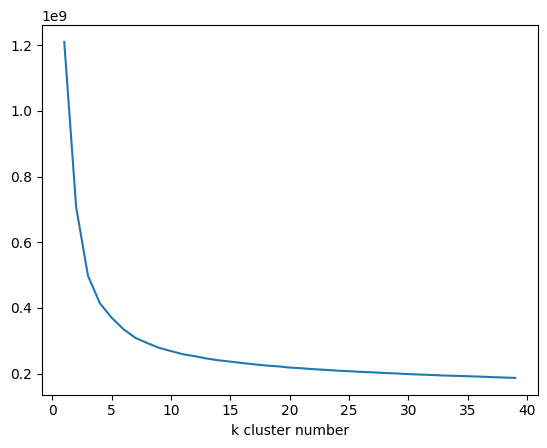

In [12]:
#kmeans to find the k number of clusters to use for the LDA
import matplotlib.pyplot as plt


inertias = []
ks = range(1,40)
for k in ks:
    km_test = KMeans(n_clusters=k).fit(data_vectorized)
    inertias.append(km_test.inertia_)

plt.plot(ks, inertias)
plt.xlabel('k cluster number')

In [13]:
lda_model = LatentDirichletAllocation(n_components=10)
lda_vectors = lda_model.fit_transform(data_vectorized)

In [14]:
#print topics

def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names_out()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])
print_topics(lda_model, vectorizer)

Topic 0:
[('you', 501613.7456809911), ('to', 411489.6133963429), ('the', 290302.10240377585), ('your', 285395.4858701999), ('and', 283886.1834210941), ('of', 238613.86532810825), ('that', 178566.6261014026), ('or', 177102.40126414935), ('can', 153330.80087546443), ('it', 151290.5359924109)]
Topic 1:
[('the', 560391.1939476741), ('and', 350650.3961099139), ('of', 266022.13306981686), ('our', 239897.22089929003), ('you', 178516.8441525711), ('in', 169716.34808625907), ('to', 169254.06178694323), ('on', 167775.54181227952), ('with', 144248.8793270076), ('from', 142942.8746802732)]
Topic 2:
[('and', 615213.9142880139), ('the', 585150.8475947985), ('with', 307534.9077755019), ('to', 297774.49982865213), ('of', 289163.0074007338), ('this', 207723.12503278514), ('in', 193272.03762690965), ('for', 185011.61574826177), ('it', 168518.80107522546), ('is', 135611.78323146733)]
Topic 3:
[('the', 416759.53309788305), ('that', 337905.94808558916), ('and', 329333.16793085897), ('to', 283785.0693504212

In [15]:
#apply the model on new data

new_data = ["Tiaras are the fashion accessory for high society brides,but how to wear them correctly? While elegant brides across the nation plan their upcoming nuptials, Tatler answers your questions on exactly how best to sport the regal accessory."]

new_data_vectorized = vectorizer.transform(new_data) #vectorize first
lda_vectors = lda_model.transform(new_data_vectorized) #transform using lda model fitted with our inventory_urls

print("topic 0 :", lda_vectors[0][0])
print("topic 1 :", lda_vectors[0][1])


topic 0 : 0.3192922322697688
topic 1 : 0.14299810535275795


In [ ]:
# We have the base lda - unsupervised
# Kmeans to determine number of clusters in our data
# Update LDA number of clusters to the relevant one

## K means

## pre trained model

In [4]:
#Load pre trained model
model = SentenceTransformer('all-mpnet-base-v2')

/Users/martafillolbruguera/.pyenv/versions/3.10.6/envs/affinity_env/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [5]:
#embedding categories we want to vectorize to be able to compare to our audience

sports = model.encode("sports for young men and children")
fashion = model.encode("fashion")

#content from scraping urls

embeddings_football = model.encode("I want to start playing football")
embeddings_fashion = model.encode("I need a new outfit for the party")

In [ ]:
#compare the categories (interests from audience vs topics detected from text)
fashion @ embeddings_fashion

0.33317417

In [ ]:
topic1 = model.encode('edu game team line hockey')
topic1 @ sports

0.34371024

In [6]:
#creates dataframe with text and embedding. ¿¿Why do we need this??


df = pd.DataFrame({"texts": ["New text", "We need more sport"]})
def embed(text):
    embedding = model.encode(text)
    return embedding

df["embedding"] = df.texts.apply(embed)

In [7]:
targets = [
"Fashion",
"Pets",
"Cooking",
"Fitness",
"Movies",
"Gaming",
"Travel",
"Cars and automobiles",
"Outdoor activities",
"Books",
"Finance and investments",
"Business and entrepreneurship",
"Photography",
"Art",
"Social causes and activism",
"Health and wellness ",
"Gardening",
"Technology",
"Education and learning",
"Sports",
"Nature",
"History",
"Parenting and family",
"Music",
"Food and dining ",
"DIY and crafts ",
"Beauty",
"Science",
"Politics"
]
import pandas as pd
interests = pd.DataFrame({"interest":targets})


In [8]:
interests["embedding"] = interests.interest.apply(embed)

In [27]:
topic11 = "information medical professional"
topic11_embedding = embed(topic11)

In [28]:
topic11_embedding

array([ 2.40322389e-02, -7.10182171e-03,  1.16103375e-03, -4.24108729e-02,
       -1.16454307e-02,  1.97597761e-02,  3.98604348e-02,  7.57682770e-02,
       -2.96205096e-02,  1.71369016e-02,  2.92218439e-02, -1.93391796e-02,
        1.47796441e-02, -1.36811985e-02,  2.73945592e-02, -7.34878927e-02,
       -1.86326578e-02,  3.20309550e-02,  4.82782349e-02, -1.29107190e-02,
       -5.21783382e-02,  2.81099286e-02, -4.41021957e-02,  3.67141105e-02,
        2.91602761e-02, -3.53069678e-02,  2.80554648e-02,  3.43978847e-03,
        3.10408510e-03, -2.83938106e-02,  7.76202045e-03, -2.52980012e-02,
       -2.60417461e-02, -7.07783923e-02,  1.38531516e-06,  3.25573236e-02,
        3.13118566e-03,  3.22465338e-02, -6.64143860e-02, -7.55163208e-02,
        2.25171912e-03, -5.89696355e-02,  4.71020862e-03,  2.45765038e-02,
       -1.16063995e-04, -3.62350643e-02,  4.42391895e-02,  3.31064686e-02,
       -4.92657423e-02,  2.55532358e-02,  1.20062586e-02,  4.92227487e-02,
       -1.55193238e-02, -

In [29]:
#input_ = url # google.com
# lda topic - embed the topic
# find closest in interests embeddding
#output = interest #'Education and learning	'
results = []
for each in interests.embedding.values:
    results.append(topic11_embedding @ each)

In [31]:
import numpy as np
np.array(results).argmax()

15

In [32]:
interests

,interest,embedding
0,Fashion,"[0.01728209, 0.07585772, -0.02631025, -0.00446..."
1,Pets,"[0.045367725, 0.07620043, -0.04535109, -0.0391..."
2,Cooking,"[-0.008611952, -0.024475407, -0.0055521163, -0..."
3,Fitness,"[0.001419213, -0.0037784684, 0.01895474, 0.008..."
4,Movies,"[0.0025025068, 0.055331282, -0.0063840663, -0...."
5,Gaming,"[-0.02534862, -0.02541417, -0.046696495, 0.042..."
6,Travel,"[-0.0031953785, 0.055348586, -0.040888492, 0.0..."
7,Cars and automobiles,"[0.010719352, 0.07491442, -0.0073154974, 0.042..."
8,Outdoor activities,"[-0.013782986, -0.04851159, -0.020418737, 0.04..."
9,Books,"[0.021911902, 0.041893844, -0.0049016504, -0.0..."


In [ ]:
input_url = "webpage/results"
output_category = "Animamls"

# 100k with their interest. 100k into 20 groups. Each have their own interests. We need to find which group in interested in Animals
# We find out that this grouip is number 2
# What is the age the age of this group, gender, what are their other interests - Main other intersts Sports

# List of ads - select the best one
# Slamg in the ad
# Classic language and has sport image in
